# Single BH

In [ ]:
using Plots, Printf, Measures
using LaTeXStrings
include("../../../Utils/misc_stdout.jl")

## Level7

### Block8

Zcs/sec
  singleBH-Z4cowGPU-7Levels: [ 6.76e+08, 4.05e+11]
  singleBH-Z4cowGPU-7Levels-InterpGNo: [ 6.19e+08, 2.68e+11]


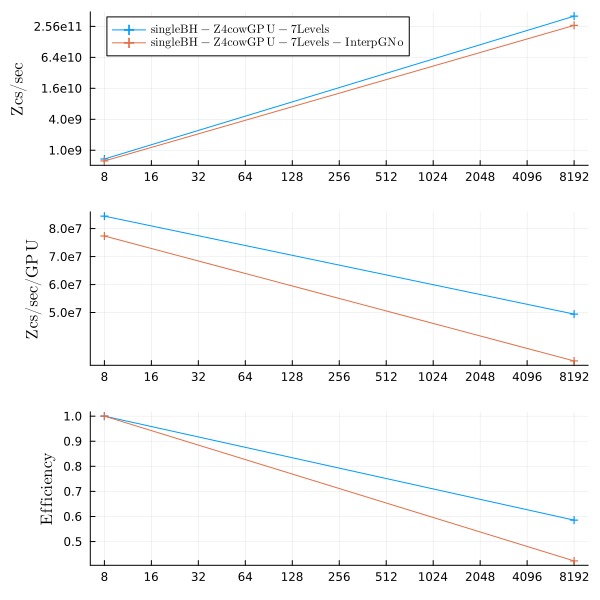

In [2]:
let patt_dirss = [
        ([
            (r"singleBH_Z4cowGPU_L7_N\d+_r0000", "singleBH-Z4cowGPU-7Levels"),
        ], "../data/singleBH-Scaling-Test/Levels7/Block8-InterpGhostOnly/", :cross),
        ([
            (r"singleBH_Z4cowGPU_L7_N\d+_r0000", "singleBH-Z4cowGPU-7Levels-InterpGNo"),
        ], "../data/singleBH-Scaling-Test/Levels7/Block8-InterpGhostOnlyNo/", :cross),
    ]

    # Plot Zcs/sec
    plt1 = plot(ylabel=L"\mathrm{Zcs}/\mathrm{sec}", xscale=:log10, yscale=:log10)
    xs = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [1e9, 4e9, 1.6e10, 6.4e10, 2.56e11]
    yticks!(plt1, ys, [string(n) for n in ys])

    # Plot Efficiency
    plt2 = plot(ylabel=L"\mathrm{Efficiency}", xscale=:log10)
    xticks!(plt2, xs, [string(n) for n in xs])
    
    plt3 = plot(ylabel=L"\mathrm{Zcs/sec/GPU}", xscale=:log10)
    xticks!(plt3, xs, [string(n) for n in xs])
    ys = [5e7, 6e7, 7e7, 8e7]
    yticks!(plt3, ys, [string(n) for n in ys])
    
    println("Zcs/sec")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "ZcsPerSecond", range=:)
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            # Plot Zcs/sec
            plot!(plt1, dat[1] * 8, dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            
            plot!(plt3, dat[1] * 8, dat[2] ./ (dat[1] * 8), label = "",  marker = mark)
            
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")

            # Plot Efficiency
            value_per_node = dat[2] ./ dat[1]
            efficiency = value_per_node ./ first(value_per_node)
            plot!(plt2, dat[1] * 8, efficiency, label = "", marker = mark)

            # ideal
            #plot!(plt1, dat[1] * 8, dat[2][1] .* dat[1], label="", linestyle=:dash, color=:lightgray)
        end
    end

    plt = plot(plt1, plt3, plt2, layout=(3,1), size=(600, 600))
    display(plt)
end

## Speed

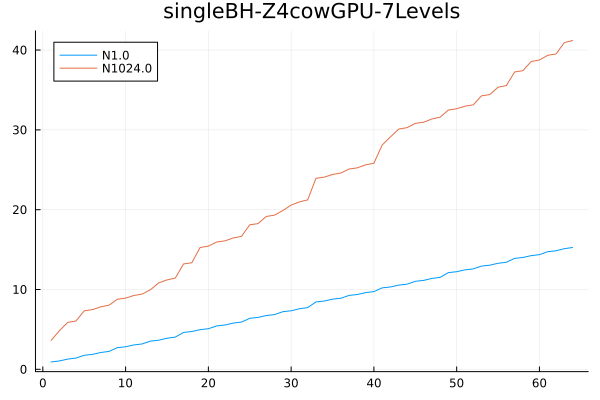

In [3]:
let patt_dirss = [
        ([
            (r"singleBH_Z4cowGPU_L7_N\d+_r0000", "singleBH-Z4cowGPU-7Levels"),
        ], "../data/singleBH-Scaling-Test/Levels7/Block8-InterpGhostOnly/", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = MiscStdout.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[4], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,1))
    display(plt)
end

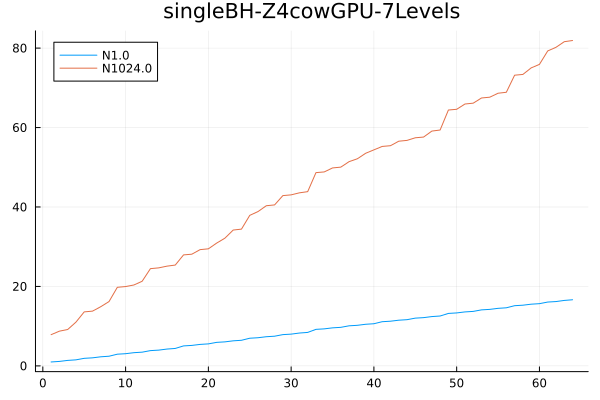

In [4]:
let patt_dirss = [
        ([
            (r"singleBH_Z4cowGPU_L7_N\d+_r0000", "singleBH-Z4cowGPU-7Levels"),
        ], "../data/singleBH-Scaling-Test/Levels7/Block8-InterpGhostOnlyNo/", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = MiscStdout.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[4], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,1))
    display(plt)
end